In [1]:
!pip install pillow

    100% |████████████████████████████████| 3.9MB 477kB/s ta 0:00:011


In [15]:
from PIL import Image
import numpy as np

In [50]:
sunset = Image.open('./data/training/sunset_1.jpg')
sampled_image = np.array(sunset.resize((400, 300)))

In [38]:
batman = np.array(Image.open('./data/training/dominant-example.png').convert('RGB'))
sampled_image = batman

In [18]:
from skylite_playground.eigenvectors import find_dominant_colors

In [19]:
from matplotlib import pyplot as plot

In [74]:
max_colors = 6
output = np.zeros((max_colors,) + sampled_image.shape)
for index, n_colors in enumerate(range(1, max_colors + 1)):
    color, quant_image = find_dominant_colors(sampled_image, n_colors)
    output[index] = quant_image

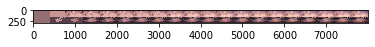

In [68]:
plot.imshow(np.concatenate(output, axis=1))

In [54]:
sunset.save('tmp_out.jpg', 'JPEG')

In [75]:
tmp = np.concatenate(output, axis=1)

array([[0.58388392, 0.43484676, 0.44795859],
       [0.58388392, 0.43484676, 0.44795859],
       [0.58388392, 0.43484676, 0.44795859],
       ...,
       [0.37177932, 0.31278864, 0.35434659],
       [0.37177932, 0.31278864, 0.35434659],
       [0.37177932, 0.31278864, 0.35434659]])

In [76]:
Image.fromarray(np.uint8(tmp * 255)).save(f'eigen_output_{max_colors}.jpg', 'JPEG')